# Name: Nalla Vedavathi

# email: nallaveda15@gmail.com

# Task : #6

# Task Name: Prediciton Using Decision Tree Algorithm

# Problem Statement: 
Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 


# Dataset: 
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines. It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

# The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

# Importing the libraries

In [1]:
# Importing libraries in Python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# to ignore warning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

# Importing the dataset

In [2]:
#importing the dataset
data = pd.read_csv("D:\8th sem works\internship\Iris.csv")

In [3]:
#dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
#understanding the dataset features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [6]:
#Checking the missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# checking whether the data is balanced or not.
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Given dataset is balanced

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualization

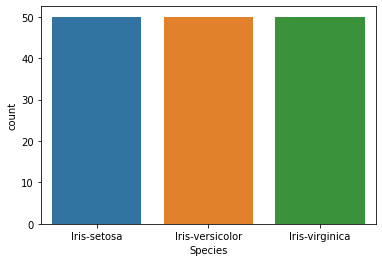

In [9]:
sns.countplot(data['Species'])
plt.show()

<AxesSubplot:>

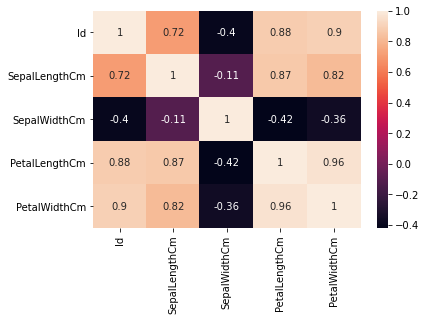

In [10]:
sns.heatmap(data.corr(),annot=True)

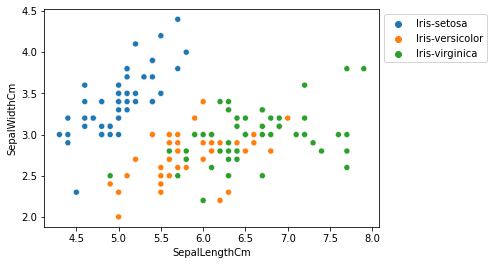

In [11]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',hue='Species', data=data, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


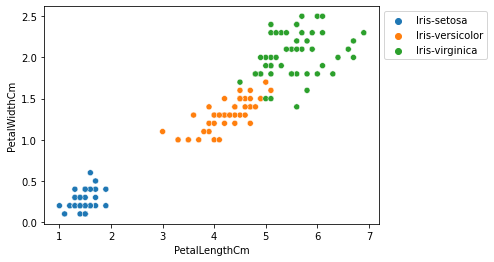

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',hue='Species', data=data, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


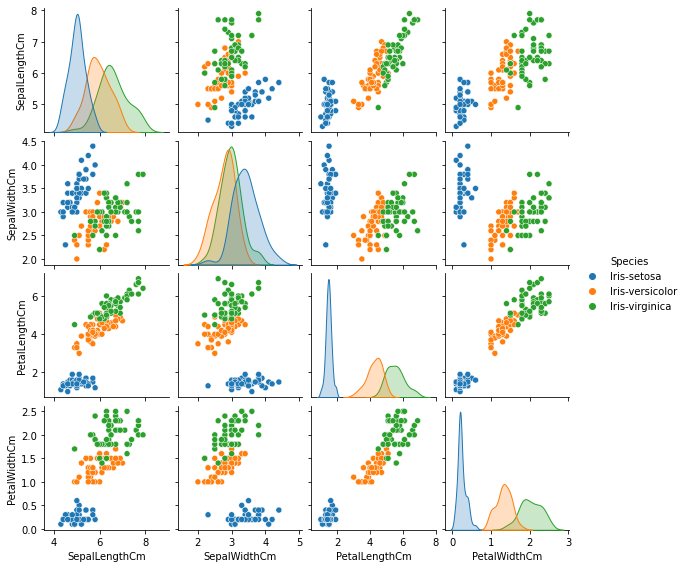

In [13]:
sns.pairplot(data.drop(['Id'], axis = 1),
             hue='Species', height=2)

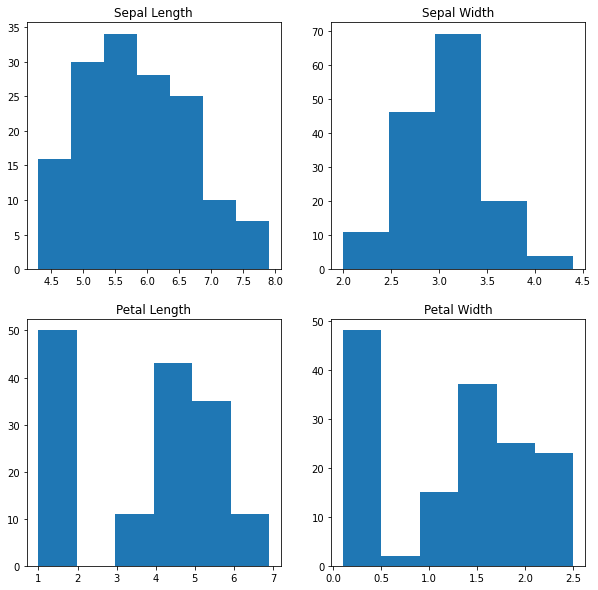

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(data['SepalLengthCm'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(data['SepalWidthCm'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(data['PetalLengthCm'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(data['PetalWidthCm'], bins=6);

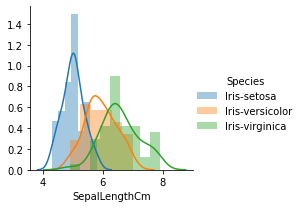

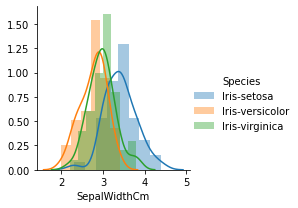

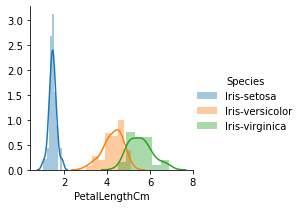

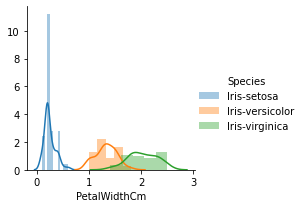

In [15]:
plot = sns.FacetGrid(data, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()
 
plot = sns.FacetGrid(data, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()
 
plot = sns.FacetGrid(data, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()
 
plot = sns.FacetGrid(data, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()
 
plt.show()

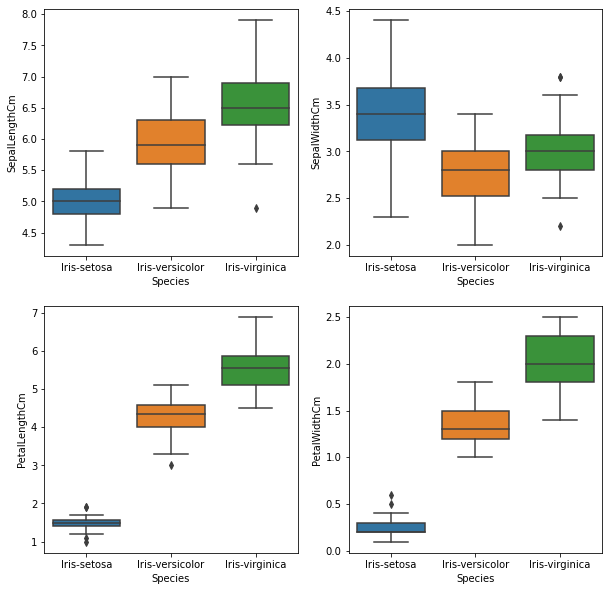

In [16]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=data)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()


# Data Preprocessing

In [17]:
#Using Label encoder
labelencoder = LabelEncoder()
data['Species'] = labelencoder.fit_transform(data['Species'])

In [18]:
data = data.drop(["Id"],axis = 1)

# Splitting the data

In [19]:
X = data.iloc[[]]

In [20]:
X= data.iloc[:, : -1]

In [21]:
y = data.iloc[:,-1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


# Model training 

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

# Predicting the test data

In [24]:
pred = clf.predict(X_test)

In [25]:
from sklearn import metrics
print("---------------------------------Decision Tree-------------------------------")
print("Accuracy of the model : ",metrics.accuracy_score(y_test,pred))
print("----------------------------------------------------------------------------------")
print(classification_report(y_test,pred))
print("----------------------------------------------------------------------------------")
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print(confusion_matrix)
print("----------------------------------------------------------------------------------")

---------------------------------Decision Tree-------------------------------
Accuracy of the model :  0.9666666666666667
----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

----------------------------------------------------------------------------------
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
----------------------------------------------------------------------------------


# Visualizing the model

[Text(133.92000000000002, 199.32, 'X[2] <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(100.44000000000001, 90.6, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(66.96000000000001, 54.359999999999985, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8400000000000

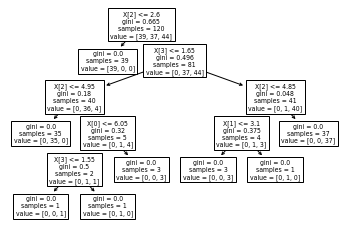

In [26]:
tree.plot_tree(clf)

# Thank You